# Pandas

**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)

### 1) Đọc, quan sát và chuẩn hóa dữ liệu
Đọc file dữ liệu "Data_Bicycle_Counter.csv" và thực hiện các yêu cầu sau:

1.1 Kiểm tra dữ liệu missing

1.2 Liệt kê các thời điểm không có dữ liệu (Missing values)

1.3 Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian

1.4 Thiết lập cột Date làm index cho DataFrame ()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Đọc dữ liệu
df_bicycle = pd.read_csv('Data_Bicycle_Counter.csv')
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135614 entries, 0 to 135613
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          135614 non-null  object 
 1   Fremont Bridge Total          135593 non-null  float64
 2   Fremont Bridge East Sidewalk  135593 non-null  float64
 3   Fremont Bridge West Sidewalk  135593 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [89]:
df_bicycle

Date  Fremont Bridge Total  \
0       10/03/2012 12:00:00 AM                  13.0   
1       10/03/2012 01:00:00 AM                  10.0   
2       10/03/2012 02:00:00 AM                   2.0   
3       10/03/2012 03:00:00 AM                   5.0   
4       10/03/2012 04:00:00 AM                   7.0   
...                        ...                   ...   
135609  08/31/2020 07:00:00 PM                 190.0   
135610  08/31/2020 08:00:00 PM                 108.0   
135611  08/31/2020 09:00:00 PM                  33.0   
135612  08/31/2020 10:00:00 PM                  36.0   
135613  08/31/2020 11:00:00 PM                   8.0   

        Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk  
0                                4.0                           9.0  
1                                4.0                           6.0  
2                                1.0                           1.0  
3                                2.0                           3.0  
4                                6.0                           1.0  
...                              ...                           ...  
135609                          79.0                         111.0  
135610                          58.0                          50.0  
135611                          11.0                          22.0  
135612                          14.0                          22.0  
135613                           2.0                           6.0  

[135614 rows x 4 columns]

In [90]:
# kiểm tra dữ liệu missing bằng isnull() và sum()
df_bicycle.isnull().sum()


Date                             0
Fremont Bridge Total            21
Fremont Bridge East Sidewalk    21
Fremont Bridge West Sidewalk    21
dtype: int64

In [91]:
# Liệt kê các thời điểm không có dữ liệu (Missing values)
df_bicycle[df_bicycle.isnull().any(axis=1)]


Date  Fremont Bridge Total  \
6105    06/14/2013 09:00:00 AM                   NaN   
6106    06/14/2013 10:00:00 AM                   NaN   
12530   03/09/2014 02:00:00 AM                   NaN   
21266   03/08/2015 02:00:00 AM                   NaN   
22331   04/21/2015 11:00:00 AM                   NaN   
22332   04/21/2015 12:00:00 PM                   NaN   
30170   03/13/2016 02:00:00 AM                   NaN   
38906   03/12/2017 02:00:00 AM                   NaN   
47642   03/11/2018 02:00:00 AM                   NaN   
56378   03/10/2019 02:00:00 AM                   NaN   
73977   06/14/2013 09:00:00 AM                   NaN   
73978   06/14/2013 10:00:00 AM                   NaN   
80402   03/09/2014 02:00:00 AM                   NaN   
89138   03/08/2015 02:00:00 AM                   NaN   
90203   04/21/2015 11:00:00 AM                   NaN   
90204   04/21/2015 12:00:00 PM                   NaN   
98042   03/13/2016 02:00:00 AM                   NaN   
106778  03/12/2017 02:00:00 AM                   NaN   
115514  03/11/2018 02:00:00 AM                   NaN   
124250  03/10/2019 02:00:00 AM                   NaN   
132986  03/08/2020 02:00:00 AM                   NaN   

        Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk  
6105                             NaN                           NaN  
6106                             NaN                           NaN  
12530                            NaN                           NaN  
21266                            NaN                           NaN  
22331                            NaN                           NaN  
22332                            NaN                           NaN  
30170                            NaN                           NaN  
38906                            NaN                           NaN  
47642                            NaN                           NaN  
56378                            NaN                           NaN  
73977                            NaN                           NaN  
73978                            NaN                           NaN  
80402                            NaN                           NaN  
89138                            NaN                           NaN  
90203                            NaN                           NaN  
90204                            NaN                           NaN  
98042                            NaN                           NaN  
106778                           NaN                           NaN  
115514                           NaN                           NaN  
124250                           NaN                           NaN  
132986                           NaN                           NaN

In [92]:
# đổi thành tên ngắn gọn
df_bicycle.columns = ['Date','Total', 'East', 'West']
df_bicycle

Date  Total  East   West
0       10/03/2012 12:00:00 AM   13.0   4.0    9.0
1       10/03/2012 01:00:00 AM   10.0   4.0    6.0
2       10/03/2012 02:00:00 AM    2.0   1.0    1.0
3       10/03/2012 03:00:00 AM    5.0   2.0    3.0
4       10/03/2012 04:00:00 AM    7.0   6.0    1.0
...                        ...    ...   ...    ...
135609  08/31/2020 07:00:00 PM  190.0  79.0  111.0
135610  08/31/2020 08:00:00 PM  108.0  58.0   50.0
135611  08/31/2020 09:00:00 PM   33.0  11.0   22.0
135612  08/31/2020 10:00:00 PM   36.0  14.0   22.0
135613  08/31/2020 11:00:00 PM    8.0   2.0    6.0

[135614 rows x 4 columns]

In [93]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian bằng hàm to_datetime()
df_bicycle['Date'] = pd.to_datetime(df_bicycle['Date'],format = '%m/%d/%Y %I:%M:%S %p')
df_bicycle

Date  Total  East   West
0      2012-10-03 00:00:00   13.0   4.0    9.0
1      2012-10-03 01:00:00   10.0   4.0    6.0
2      2012-10-03 02:00:00    2.0   1.0    1.0
3      2012-10-03 03:00:00    5.0   2.0    3.0
4      2012-10-03 04:00:00    7.0   6.0    1.0
...                    ...    ...   ...    ...
135609 2020-08-31 19:00:00  190.0  79.0  111.0
135610 2020-08-31 20:00:00  108.0  58.0   50.0
135611 2020-08-31 21:00:00   33.0  11.0   22.0
135612 2020-08-31 22:00:00   36.0  14.0   22.0
135613 2020-08-31 23:00:00    8.0   2.0    6.0

[135614 rows x 4 columns]

In [94]:
df_bicycle = df_bicycle.set_index('Date')
print(df_bicycle.index.name)

Date


In [95]:
df_bicycle

Total  East   West
Date                                   
2012-10-03 00:00:00   13.0   4.0    9.0
2012-10-03 01:00:00   10.0   4.0    6.0
2012-10-03 02:00:00    2.0   1.0    1.0
2012-10-03 03:00:00    5.0   2.0    3.0
2012-10-03 04:00:00    7.0   6.0    1.0
...                    ...   ...    ...
2020-08-31 19:00:00  190.0  79.0  111.0
2020-08-31 20:00:00  108.0  58.0   50.0
2020-08-31 21:00:00   33.0  11.0   22.0
2020-08-31 22:00:00   36.0  14.0   22.0
2020-08-31 23:00:00    8.0   2.0    6.0

[135614 rows x 3 columns]

### 2) Khám phá tập dữ liệu
Sử dụng các đặc trưng thống kê

In [96]:
#Sử dụng sum tính tổng lượt người đi xe đạp
df_bicycle.sum()

Total    15341827.0
East      6997333.0
West      8344494.0
dtype: float64

<BarContainer object of 2 artists>

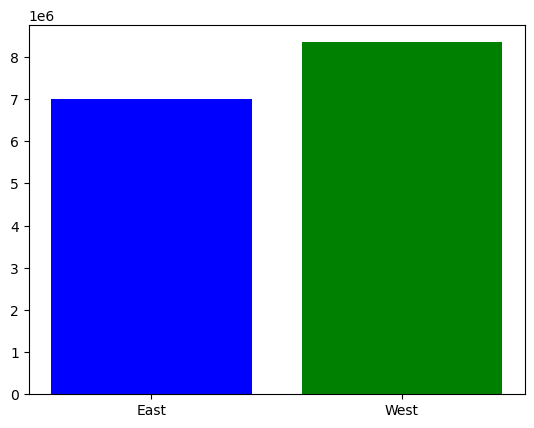

In [97]:
#Thống kê số lượng xe đạp qua cầu phía West
total_West = df_bicycle['West'].sum()
total_East =df_bicycle['East'].sum()

#Trực quan hóa số liệu thống kê (lựa chọn biểu đồ thích hợp để trực quan hóa dữ liệu trên)
plt.bar(['East','West'],[total_East,total_West],color = ['blue','green'])

In [98]:
#Thống kê số lượng xe đạp qua cầu phía West

#Trực quan hóa số liệu thống kê (lựa chọn biểu đồ thích hợp để trực quan hóa dữ liệu trên)


Nhận xét:
- Lưu lượng xe đi qua cầu ở phía Tây nhiều hơn so với phía Đông
- Tháng 3 và 6 là 2 tháng ít có xe qua cầu, gần như không có dữ liệu
-

### 3) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung và rút ra kết luận (tối thiểu 2 kết luận)

In [99]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019
df_bicycle = df_bicycle.sort_index()
df_full_year = df_bicycle.loc['2013':'2019']
df_full_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122688 entries, 2013-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   122668 non-null  float64
 1   East    122668 non-null  float64
 2   West    122668 non-null  float64
dtypes: float64(3)
memory usage: 3.7 MB


In [100]:
df_full_year

Total  East  West
Date                                  
2013-01-01 00:00:00    7.0   2.0   5.0
2013-01-01 00:00:00    7.0   2.0   5.0
2013-01-01 01:00:00   21.0   9.0  12.0
2013-01-01 01:00:00   21.0   9.0  12.0
2013-01-01 02:00:00   16.0   8.0   8.0
...                    ...   ...   ...
2019-12-31 21:00:00   15.0   8.0   7.0
2019-12-31 22:00:00   15.0   5.0  10.0
2019-12-31 22:00:00   15.0   5.0  10.0
2019-12-31 23:00:00   16.0   7.0   9.0
2019-12-31 23:00:00   16.0   7.0   9.0

[122688 rows x 3 columns]

In [101]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
#Tính tổng số lượt qua cầu theo năm
yearly = df_full_year.resample('YE').sum()
yearly

Total       East       West
Date                                       
2013-12-31  1856558.0   957982.0   898576.0
2014-12-31  2012392.0  1030652.0   981740.0
2015-12-31  1973112.0  1001830.0   971282.0
2016-12-31  1964940.0   936608.0  1028332.0
2017-12-31  1926270.0   825010.0  1101260.0
2018-12-31  2103760.0   851310.0  1252450.0
2019-12-31  2374292.0   899708.0  1474584.0

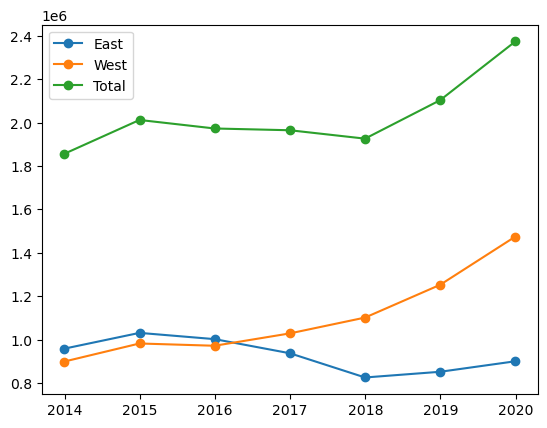

In [102]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.plot(yearly.index,yearly['East'],marker = 'o',label = 'East')
plt.plot(yearly.index,yearly['West'],marker = 'o',label = 'West')
plt.plot(yearly.index,yearly['Total'],marker = 'o',label = 'Total')
plt.legend()
plt.show()

Nhận xét:
- Từ 2014-2016, xu hướng người đi ở phía đông có xu hướng nhỉnh hơn so với phía tây, nhưng từ sau 2016 thì người đi ở phía Tây có xu hướng tăng mạnh hơn so với ở phía Đông
- Xu hướng đi bên hướng tây nhìn chung tăng đều hơn, còn ở hướng Đông thì có vẻ giảm nhẹ qua từng năm

### 4) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ và rút ra kết luận (tối thiểu 2 kết luận)

In [109]:
df_bicycle

Total  East   West
Date                                   
2012-10-03 00:00:00   13.0   4.0    9.0
2012-10-03 00:00:00   13.0   4.0    9.0
2012-10-03 01:00:00   10.0   4.0    6.0
2012-10-03 01:00:00   10.0   4.0    6.0
2012-10-03 02:00:00    2.0   1.0    1.0
...                    ...   ...    ...
2020-08-31 19:00:00  190.0  79.0  111.0
2020-08-31 20:00:00  108.0  58.0   50.0
2020-08-31 21:00:00   33.0  11.0   22.0
2020-08-31 22:00:00   36.0  14.0   22.0
2020-08-31 23:00:00    8.0   2.0    6.0

[135614 rows x 3 columns]

In [114]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
data_month =  df_bicycle.resample('M').sum()
data_month

C:\Users\Student\AppData\Local\Temp\ipykernel_7532\2420151552.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_month =  df_bicycle.resample('M').sum()


Total     East     West
Date                                  
2012-10-31  131390.0  67528.0  63862.0
2012-11-30  101294.0  52124.0  49170.0
2012-12-31   72738.0  37216.0  35522.0
2013-01-31   89768.0  45820.0  43948.0
2013-02-28  100054.0  51796.0  48258.0
...              ...      ...      ...
2020-04-30  130750.0  61868.0  68882.0
2020-05-31   72668.0  33702.0  38966.0
2020-06-30   75787.0  33053.0  42734.0
2020-07-31   88177.0  37788.0  50389.0
2020-08-31   88351.0  37919.0  50432.0

[95 rows x 3 columns]

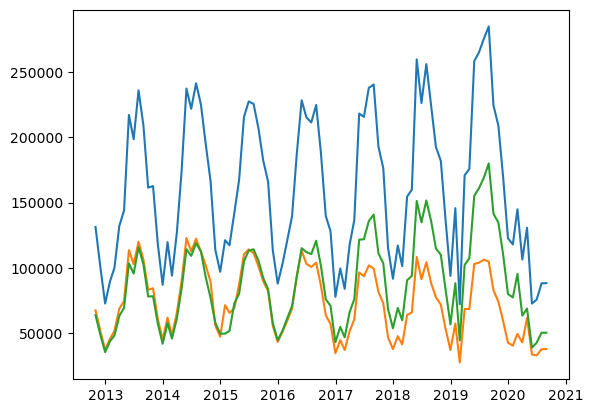

In [117]:
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.plot(data_month)

C:\Users\Student\AppData\Local\Temp\ipykernel_7532\626472037.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_2019_month = data_2019.resample('M').sum()


<BarContainer object of 12 artists>

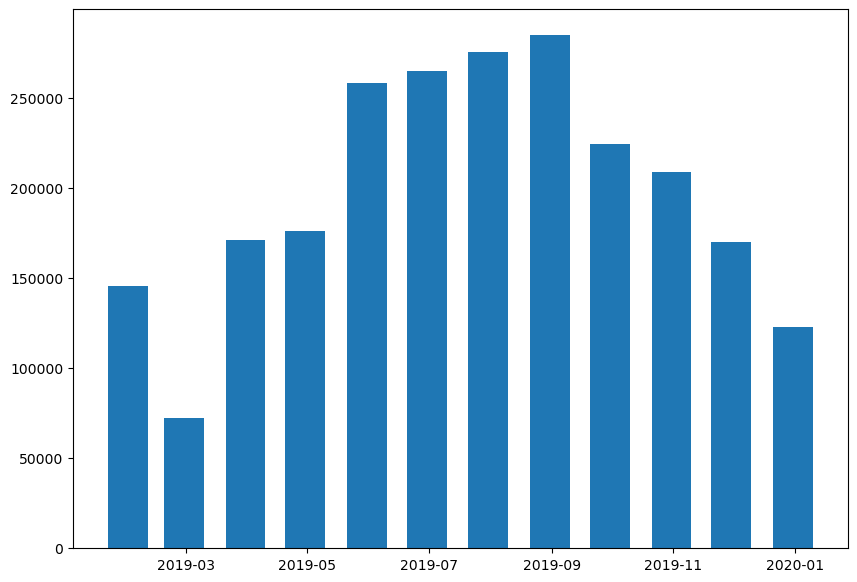

In [135]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].
data_2019 = df_bicycle.loc['2019',['Total']]
data_2019_month = data_2019.resample('M').sum()
#Trực quan hóa trên biểu đồ, lựa chọn biểu đồ thích hợp
plt.figure(figsize=(10,7))
plt.bar(data_2019_month.index,data_2019_month['Total'],width= 20)

Nhận xét:
- Lượng xe qua cầu trong tháng 6-9 là cao nhất, kể từ khi qua mùa đông tới mùa xuân năm sau số lượt đi qua cầu giảm dần
- nhìn chung lưu lượng xe qua cầu vẫn đều qua các mùa, duy chỉ có tháng 3 là ít có xe qua cầu nhất


### 5) Thống kê lượng đi xe đạp theo giờ và rút ra kết luận (tối thiểu 2 kết luận)

In [136]:
#Tính trung bình lượng xe theo từng giờ qua cầu trong toàn bộ tập dữ liệu sử dụng groupby
by_time = df_bicycle.groupby(df_bicycle.index.hour).mean()
by_time

Total        East        West
Date                                    
0      11.304902    4.791541    6.513360
1       5.984074    2.680764    3.303309
2       3.938453    1.890032    2.048421
3       2.903557    1.493895    1.409662
4       6.487878    3.440807    3.047071
5      25.589630   15.619182    9.970448
6      89.945496   54.047779   35.897717
7     227.002831  140.801982   86.200849
8     322.147231  189.640241  132.506990
9     188.577093  102.221101   86.355992
10    100.344840   52.377766   47.967074
11     89.222340   46.166578   43.055762
12     95.248008   48.234024   47.013985
13    101.929747   50.690143   51.239604
14    111.129204   53.007611   58.121593
15    141.325841   62.540531   78.785310
16    232.995752   83.464425  149.531327
17    389.189381  112.824956  276.364425
18    264.838761   89.667965  175.170796
19    130.602301   49.622124   80.980177
20     75.016991   30.491858   44.525133
21     47.885133   20.899292   26.985841
22     31.201770   13.426549   17.775221
23     20.508142    8.390973   12.117168

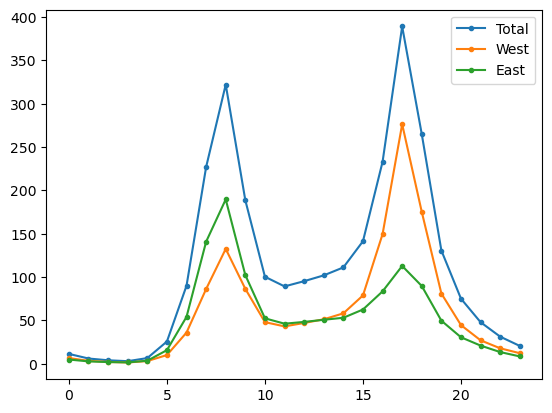

In [145]:
#Trực quan hóa dữ liệu:
plt.plot(by_time.index,by_time['Total'],marker = '.',label = 'Total' )
plt.plot(by_time.index,by_time['West'],marker = '.',label = 'West' )
plt.plot(by_time.index,by_time['East'],marker = '.',label = 'East' )
plt.legend()

Nhận xét:
- tần suất qua cầu qua các giờ có sự thay đổi rõ rệt, ta có thể thấy rằng các giờ cao điểm(7-9h và 16-18h) lưu lượng xe qua cầu tăng mạnh nhất
- các giờ còn lại xe ít xe dần và đạt cực tiểu vào khoảng 0-4h sáng


### 6) Thống kê lượng xe trung bình theo ngày trong tuần và rút ra kết luận (tối thiểu 2 kết luận)

In [146]:
#Nhóm dữ liệu theo ngày trong tuần và tính trung bình sử dụng groupby và mean
df_weekday = df_bicycle.groupby(df_bicycle.index.dayofweek).mean()
#Đổi tên index theo ngày dễ quan sát
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday


Total       East       West
Mon    132.039395  58.638527  73.400867
Tues   140.619442  62.726267  77.893175
Wed    139.598217  62.306091  77.292126
Thurs  132.737108  59.636035  73.101073
Fri    120.132101  53.894702  66.237399
Sat     64.290376  32.242720  32.047656
Sun     62.537484  31.765849  30.771635

In [147]:
#Thực hiện thống kê số lượng người đi xe đạp qua cầu
#Tách giữa ngày làm việc [thứ 2 - thứ 5] và ngày cuối tuần [thứ 7, CN]
df_weekend = np.where(df_bicycle.index.weekday < 5, 'Weekday', 'Weekend')
#Tính lượng người đi qua trung bình theo giờ giữa các ngày trong tuần và cuối tuần
df_by_time = df_bicycle.groupby([df_weekend, df_bicycle.index.time]).mean()
df_by_time

Total        East        West
Weekday 00:00:00    9.457766    4.056725    5.401040
        01:00:00    4.685410    2.105772    2.579638
        02:00:00    3.124102    1.540253    1.583849
        03:00:00    2.684667    1.400297    1.284370
        04:00:00    7.548427    4.185286    3.363141
        05:00:00   32.884815   20.301214   12.583602
        06:00:00  119.124102   72.465940   46.658162
        07:00:00  304.762200  190.401784  114.360416
        08:00:00  426.898935  252.931880  173.967055
        09:00:00  231.165056  125.983147  105.181908
        10:00:00  100.296159   52.005700   48.290458
        11:00:00   76.339281   39.444857   36.894424
        12:00:00   79.305576   39.797274   39.508302
        13:00:00   85.723309   41.936587   43.786723
        14:00:00   97.395937   44.588949   52.806987
        15:00:00  140.262884   58.340436   81.922448
        16:00:00  273.199950   90.102577  183.097374
        17:00:00  500.728444  135.932607  364.795837
        18:00:00  336.802279  108.514866  228.287413
        19:00:00  159.925917   58.199950  101.725966
        20:00:00   88.395937   34.831021   53.564916
        21:00:00   55.300793   23.790882   31.509911
        22:00:00   34.888503   14.838206   20.050297
        23:00:00   21.797324    8.888008   12.909316
Weekend 00:00:00   15.925031    6.629492    9.295539
        01:00:00    9.232342    4.118959    5.113383
        02:00:00    5.991880    2.772017    3.219863
        03:00:00    3.451053    1.728005    1.723048
        04:00:00    3.835192    1.578686    2.256506
        05:00:00    7.342627    3.908302    3.434325
        06:00:00   16.962825    7.979554    8.983271
        07:00:00   32.508055   16.741016   15.767038
        08:00:00   60.138166   31.332714   28.805452
        09:00:00   82.107187   42.815985   39.291202
        10:00:00  100.466543   53.307931   47.158612
        11:00:00  121.429988   62.970880   58.459108
        12:00:00  135.104089   69.325898   65.778191
        13:00:00  142.465923   72.584882   69.881041
        14:00:00  145.470880   74.059480   71.411400
        15:00:00  143.983891   73.043371   70.940520
        16:00:00  132.460347   66.864932   65.595415
        17:00:00  110.272615   55.041512   55.231103
        18:00:00   84.885378   42.539033   42.346344
        19:00:00   57.275093   28.172243   29.102850
        20:00:00   41.561338   19.641264   21.920074
        21:00:00   29.341388   13.668525   15.672862
        22:00:00   21.982652    9.896530   12.086121
        23:00:00   17.284387    7.148079   10.136307

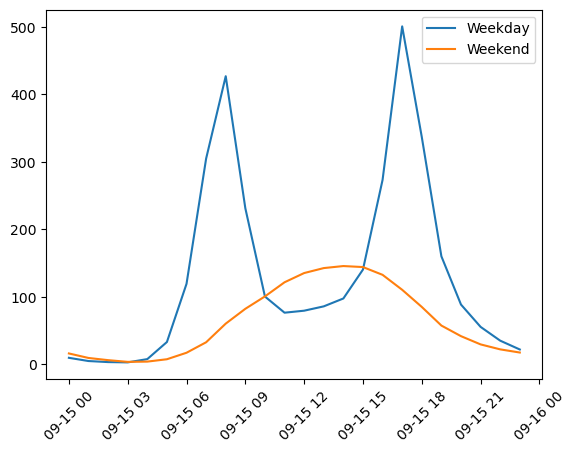

In [159]:
#Trực quan hóa dữ liệu:
weekday = df_by_time.loc['Weekday']
weekend = df_by_time.loc['Weekend']

weekday_hours = [t.hour for t in weekday.index]
weekend_hours = [t.hour for t in weekend.index]


plt.plot(weekday_times, weekday['Total'], label='Weekday')

plt.plot(weekend_times, weekend['Total'], label='Weekend')
plt.xticks(rotation = 45)
plt.legend()

Nhận xét:
- ta thấy các ngày trong tuần thì mật đồ qua cầu ở các giờ cao điểm rất cao
- các ngày cuối tuần, vì được nghỉ nên mật độ xe qua cầu rất thấp
-